In [106]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import *
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

%matplotlib inline

# ridge regression
# prediction fork
# ridge regression not good for inference?
# we care about outliers
# still care about nonlinearity
# heteroskedacity / non normality errors == not good for prediction because they only make note for confidence intervals
# check piazza for tests to skip / tests to do 

In [58]:
#TODO: loading and preprocessing
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [59]:
df.size

134092

In [60]:
#rows
len(df)

9578

In [61]:
cols = df.columns.tolist()
cols

['credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [62]:
for col in cols:
    if df[col].isna().sum() > 0:
        print('NaN values found in column : ', col)
        #drop NA values
        df = df.dropna()
        #reset the index
        df = df[np.isfinite(california).all(1)].reset_index(drop="True")
    else:
        print('No NaN values found in column : ', col)
    
#TODO: Handle NA Values

No NaN values found in column :  credit.policy
No NaN values found in column :  purpose
No NaN values found in column :  int.rate
No NaN values found in column :  installment
No NaN values found in column :  log.annual.inc
No NaN values found in column :  dti
No NaN values found in column :  fico
No NaN values found in column :  days.with.cr.line
No NaN values found in column :  revol.bal
No NaN values found in column :  revol.util
No NaN values found in column :  inq.last.6mths
No NaN values found in column :  delinq.2yrs
No NaN values found in column :  pub.rec
No NaN values found in column :  not.fully.paid


In [63]:
dtypes = dict(df.dtypes)
print(dtypes)

for col,dtype in dtypes.items():
    if dtype == np.dtype('O'):
        print('Handling object dtype column: \"{}" in design matrix with One Hot Encoding'.format(col))
        # variable to represent the collection of one hot encoded columns
        ohe = pd.get_dummies(df, drop_first=True)
        df = df.drop(col,axis=1)
        df = pd.concat([df,ohe],axis=1)

{'credit.policy': dtype('int64'), 'purpose': dtype('O'), 'int.rate': dtype('float64'), 'installment': dtype('float64'), 'log.annual.inc': dtype('float64'), 'dti': dtype('float64'), 'fico': dtype('int64'), 'days.with.cr.line': dtype('float64'), 'revol.bal': dtype('int64'), 'revol.util': dtype('float64'), 'inq.last.6mths': dtype('int64'), 'delinq.2yrs': dtype('int64'), 'pub.rec': dtype('int64'), 'not.fully.paid': dtype('int64')}
Handling object dtype column: "purpose" in design matrix with One Hot Encoding


In [64]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,...,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,...,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,...,0,1,0,0,1,0,0,0,0,0


In [65]:
g = df['int.rate']
g= g.loc[:,~g.columns.duplicated()]
g

,int.rate
0,0.1189
1,0.1071
2,0.1357
3,0.1008
4,0.1426
...,...
9573,0.1461
9574,0.1253
9575,0.1071
9576,0.1600


In [66]:
df.columns
# so get_dummies has turned the categorical variable purpose into many one hot encoded vectors

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [67]:
#TODO: split this dataset into train and test
y = df['int.rate']
y = y.loc[:,~y.columns.duplicated()]
X = df.drop('int.rate',axis=1)


In [68]:
#TODO: figure out why there's two columns for int.rate
y

,int.rate
0,0.1189
1,0.1071
2,0.1357
3,0.1008
4,0.1426
...,...
9573,0.1461
9574,0.1253
9575,0.1071
9576,0.1600


In [69]:
X

,credit.policy,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,...,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,...,1,0,0,0,0,1,0,0,0,0
3,1,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,...,1,0,0,0,0,1,0,0,0,0
4,1,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,...,2,0,0,1,0,0,0,0,0,0
9574,0,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,...,5,0,0,1,0,0,0,0,0,0
9575,0,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,...,8,0,0,1,0,1,0,0,0,0
9576,0,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,...,5,0,0,1,0,0,0,1,0,0


In [70]:
#TODO: write a script or set of functions that handles all the NA values of this dataset
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(x_train.size)
print(x_test.size)
print(y_train.size)
print(y_test.size)

229860
57480
7662
1916


In [71]:
y_train

,int.rate
7317,0.1459
350,0.0838
5206,0.1148
2673,0.0932
3528,0.1126
...,...
5734,0.1357
5191,0.1426
5390,0.1426
860,0.1166


In [73]:
#TODO: make the linear regression model before looking for outliers

#note: this step just shows that we can create an OLS model from a traintestsplit from the original dataset

#TODO: do crossvalidation for model selection


def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}


def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model





In [77]:
model_1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:               int.rate   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     835.2
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:59:25   Log-Likelihood:                 20971.
No. Observations:                7662   AIC:                        -4.190e+04
Df Residuals:                    7643   BIC:                        -4.177e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [81]:
# list of attributes https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

In [85]:
#TODO: write functions to remove outliers with high leverage and influential points
#STRETCH: include print statements that determine why these outliers were removed

model_1.resid

7317    0.012836
350    -0.013058
5206    0.005141
2673   -0.028253
3528    0.012725
          ...   
5734    0.004595
5191   -0.007436
5390   -0.003152
860    -0.015586
7270    0.001903
Length: 7662, dtype: float64

In [87]:
model_1.fittedvalues

7317    0.133064
350     0.096858
5206    0.109659
2673    0.121453
3528    0.099875
          ...   
5734    0.131105
5191    0.150036
5390    0.145752
860     0.132186
7270    0.136597
Length: 7662, dtype: float64

Text(0, 0.5, 'residuals')

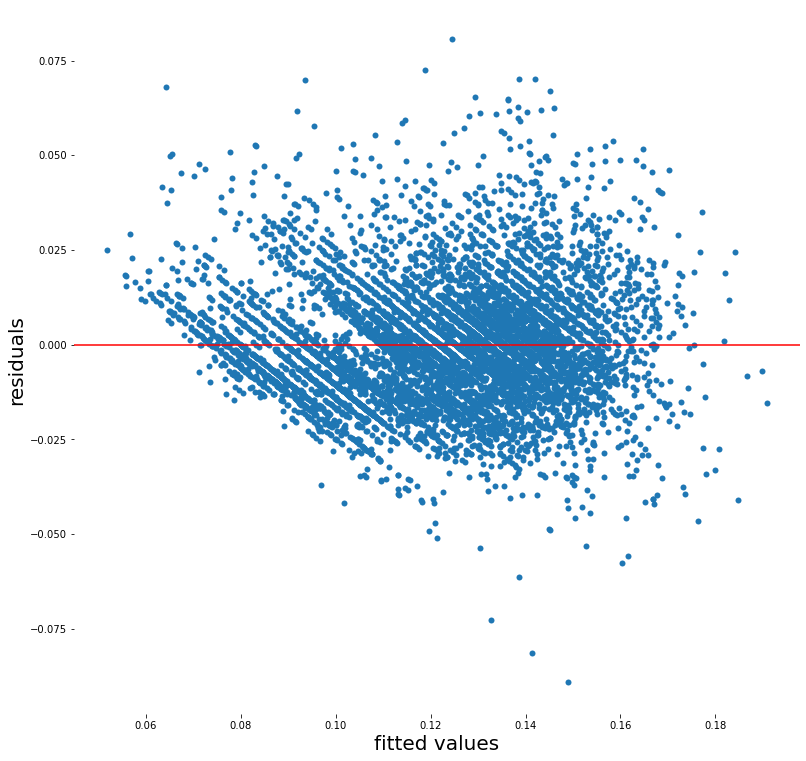

In [104]:
f, ax = plt.subplots(figsize=(13, 13))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x=model_1.fittedvalues, y=model_1.resid,
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0, ax=ax)
plt.axhline(y=0,color='red')
plt.xlabel("fitted values", fontsize=20)
plt.ylabel("residuals",fontsize=20)

In [105]:
#TODO: write function to discover points of high leverage & outliers

In [13]:
#TODO: write basic plots to show the remove outliers with regards to the plots mentioned on 11/17 notes

In [ ]:
#TODO: write function to determine which tests to do based on what the user specifies???
